In [1]:
from BCBio import GFF
from Bio import SeqIO, Seq
from Bio.SeqFeature import SeqFeature, FeatureLocation
from Bio.SeqRecord import SeqRecord
from IPython.display import Markdown as md
from collections import namedtuple, OrderedDict
import copy
import gffutils as gff
import pandas
import re
from gffutils import biopython_integration as gffbio
from tqdm import tqdm
import re
import distance
import time
import logging
from dna_features_viewer import GraphicFeature, GraphicRecord, BiopythonTranslator
logging.basicConfig(level=logging.INFO)

In [2]:
from utils import *

In [3]:
feature_type_color = {
    "CDS": "blue",
    "gene": "orange",
    "mRNA": "green",
    'rRNA': 'red',
    'tRNA': 'magenta',
    'regulatory': 'yellow',
    "misc_feature": "grey",
}

class ColoredTranslator(BiopythonTranslator):
    """Custom translator implementing the following theme:

    - Color terminators in green, CDS in blue, all other features in gold.
    - Do not display features that are restriction sites unless they are BamHI
    - Do not display labels for restriction sites
    - For CDS labels just write "CDS here" instead of the name of the gene.

    """
    
    def __init__(self, colors=None, ignored_features_types=None, **kwargs):
        
        super(BiopythonTranslator, self).__init__(**kwargs)
        
        self.colors = colors
        self.ignored_features_types=ignored_features_types
    

    def compute_feature_color(self, feature):
        return self.colors.get(feature.type, "black")
    


In [4]:
db = gff.FeatureDB("MPBAS00001.gff3.db")

In [5]:
sbw25 = SeqIO.read('MPBAS00001.embl', 'embl')

In [6]:
db_records = db_to_seqrecord(db, sbw25.seq)

41814it [00:02, 16634.81it/s]


In [7]:
translator = ColoredTranslator(feature_type_color, ignored_features_types=['misc_feature', 'chromosome'])

In [8]:
graphic_record = translator.translate_record(db_records)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f49a3a6ce50>,
 ({GF(wssB, 330496-330506 (1)): 3.0,
   GF(cellulose synthase catalytic subunit, 330496-330506 (1)): 4.0,
   GF(ena, 330496-330506 (1)): 5.0,
   GF(wssC, 330502-330513 (1)): 0,
   GF(cyclic di-GMP binding protein, 330502-330513 (1)): 1.0,
   GF(ena, 330502-330513 (1)): 2.0},
  {}))

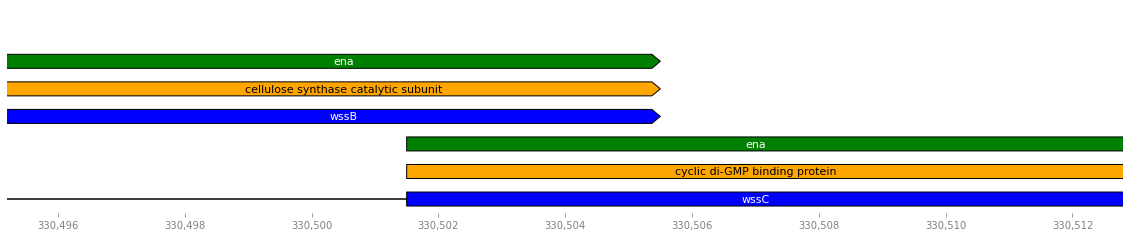

In [9]:
graphic_record.crop((db['CDS:PFLU_0301-0'].end-10, db['CDS:PFLU_0302-0'].start+10)).plot(figure_width=20)

In [10]:
graphic_record.plot?

Signature:
graphic_record.plot(
    ax=None,
    figure_width=8,
    draw_line=True,
    with_ruler=True,
    ruler_color=None,
    plot_sequence=False,
    annotate_inline=True,
    max_label_length=50,
    max_line_length=30,
    level_offset=0,
    strand_in_label_threshold='default',
    elevate_outline_annotations='default',
    x_lim=None,
    figure_height=None,
    sequence_params=None,
)
Docstring:
Plot all the features in the same Matplotlib ax.

Parameters
----------

ax
  The Matplotlib ax on which to plot the graphic record. If None is
  provided, a new figure and ax is generated, the ax is returned at
  the end.

figure_width
  Width of the figure (only if no ax was provided and a new figure is
  created) in inches.

draw_line
  If True, a base line representing the sequence will be drawn.

with_ruler
  If true, the sequence indices will be indicated at regular intervals.

ruler_color
  Ruler color.

plot_sequence
  If True and the graphic record has a "sequence" attribut

Same in refseq?

In [10]:
refseq_db = gff.FeatureDB('refseq_gcf000009225.2.db')

In [15]:
am181176 = SeqIO.read('../../fasta/Pseudomonas_fluorescens_sbw25_gca_000009225.ASM922v1.dna.chromosome.Chromosome.fa', 'fasta')

In [16]:
refseq_records = db_to_seqrecord(refseq_db, am181176)

12316it [00:01, 10859.92it/s]


In [17]:
refseq_grecs = translator.translate_record(refseq_records)

(<matplotlib.axes._subplots.AxesSubplot at 0x7f49a0fd9cd0>,
 ({GF(Geneious, 330496-330513 (1)): 0,
   GF(bcsA, 330496-330506 (1)): 3.0,
   GF(bcsA, 330496-330506 (1)): 4.0,
   GF(cellulose biosynthesis cyclic di-GMP-binding regulatory protein BcsB, 330502-330513 (1)): 1.0,
   GF(Geneious, 330502-330513 (1)): 2.0},
  {}))

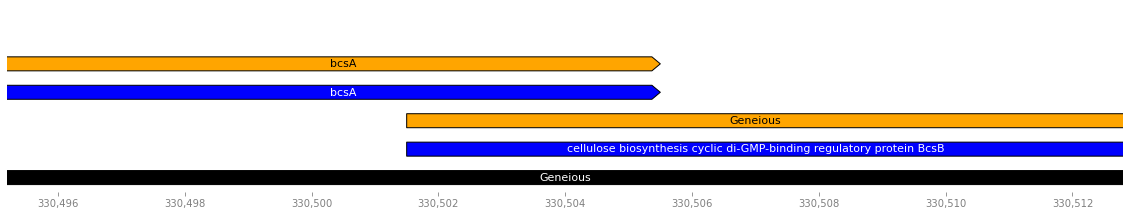

In [18]:
refseq_grecs.crop((db['CDS:PFLU_0301-0'].end-10, db['CDS:PFLU_0302-0'].start+10)).plot(figure_width=20)